In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

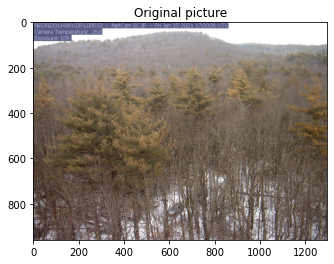

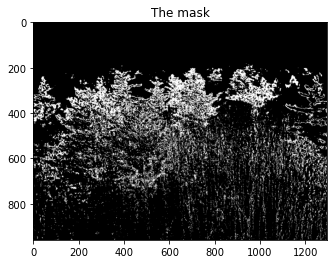

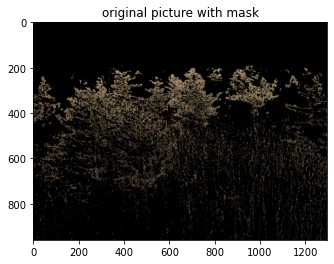

In [2]:
# get the green mask in January in Jan 15,2021
jan_15_img_name = "NEON.D01.HARV.DP1.00033_2021_01_15_120006.jpg"
jan_15_cv_img = cv2.imread("../data_raw/HARV_Canopy/" + jan_15_img_name)
jan_15_rgb = cv2.cvtColor(jan_15_cv_img, cv2.COLOR_BGR2RGB)
jan_15_hsv = cv2.cvtColor(jan_15_cv_img, cv2.COLOR_BGR2HSV)
jan_15_mask = cv2.inRange(jan_15_hsv, (13,78,61), (26,100,255))

plt.imshow(jan_15_rgb)
plt.title("Original picture")
plt.show()

plt.imshow(jan_15_mask, cmap="gray")
plt.title("The mask")
plt.show()

jan_15_after_mask = cv2.bitwise_and(jan_15_rgb, jan_15_rgb, mask=jan_15_mask)
plt.imshow(jan_15_after_mask)
plt.title("original picture with mask")
plt.show()

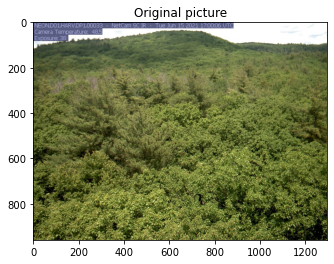

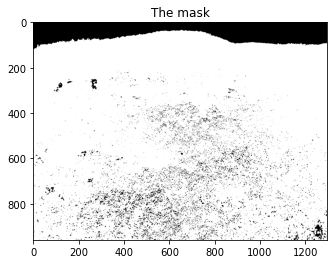

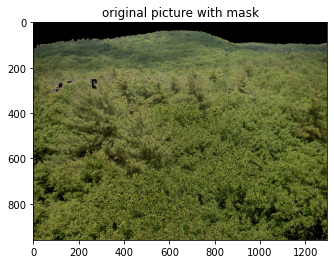

In [3]:
# get the green mask in June in Jun 15,2021
jun_15_img_name = "NEON.D01.HARV.DP1.00033_2021_06_15_120006.jpg"
jun_15_cv_img = cv2.imread("../data_raw/HARV_Canopy/" + jun_15_img_name)
jun_15_rgb = cv2.cvtColor(jun_15_cv_img, cv2.COLOR_BGR2RGB)
jun_15_hsv = cv2.cvtColor(jun_15_cv_img, cv2.COLOR_BGR2HSV)
jun_15_mask = cv2.inRange(jun_15_hsv, (21,10,0), (110,255,173))

plt.imshow(jun_15_rgb)
plt.title("Original picture")
plt.show()

plt.imshow(jun_15_mask, cmap="gray")
plt.title("The mask")
plt.show()

jun_15_after_mask = cv2.bitwise_and(jun_15_rgb, jun_15_rgb, mask=jun_15_mask)
plt.imshow(jun_15_after_mask)
plt.title("original picture with mask")
plt.show()

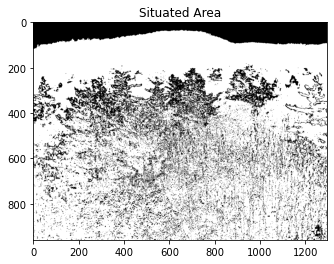

In [4]:
situated_area = cv2.bitwise_xor(jun_15_mask, jan_15_mask)
plt.imshow(situated_area, cmap="gray")
plt.title("Situated Area")
plt.show()

In [5]:
#get all image file names
image_names = []

import os
for file in os.listdir("../data_raw/HARV_Canopy"):
    if file.endswith(".jpg"):
        image_names.append(file)

image_names.sort()

In [9]:
# calculate gcc and rcc in situated area
gcc_over_time = []
rcc_over_time = []

for image_name in image_names:
    cur_img = cv2.imread(f"../data_raw/HARV_Canopy/{image_name}")
    cur_img_rgb = cv2.cvtColor(cur_img, cv2.COLOR_BGR2RGB)
    cur_img_after_mask = cv2.bitwise_and(cur_img_rgb, cur_img_rgb, mask=situated_area)
    red = np.sum(cur_img_after_mask[:,:,0])
    green = np.sum(cur_img_after_mask[:,:,1])
    blue = np.sum(cur_img_after_mask[:,:,2])
    gcc_over_time.append(green/(green+red+blue))
    rcc_over_time.append(red/(red+green+blue))

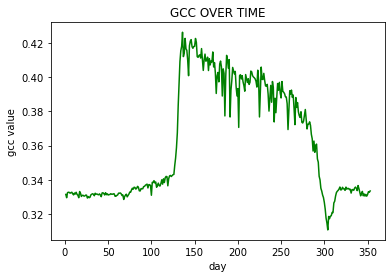

In [11]:
plt.title("GCC OVER TIME")
plt.xlabel("day")
plt.ylabel("gcc value")
plt.plot(np.arange(1,len(image_names)+1), gcc_over_time, color="green")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()

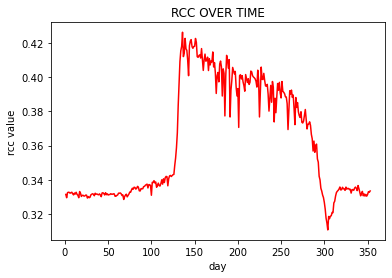

In [12]:
plt.title("RCC OVER TIME")
plt.xlabel("day")
plt.ylabel("rcc value")
plt.plot(np.arange(1,len(image_names)+1), gcc_over_time, color="red")
# plt.plot(np.arange(1,len(image_names)+1), red_over_time, color="red")
plt.show()